Цель проекта — отследить влияние условий жизни учащихся в возрасте 
от 15 до 22 лет на их успеваемость по математике, 
чтобы на ранней стадии выявлять студентов, 
находящихся в группе риска.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import numpy as np


pd.set_option('display.max_rows', 500) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

df = pd.read_csv('stud_math.csv')

Рассмотрим, какие данные хранятся в файле и какие типы данных у столбцов:

In [3]:
display(df.head(10))
df.info() 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school                 395 non-null object
sex                    395 non-null object
age                    395 non-null int64
address                378 non-null object
famsize                368 non-null object
Pstatus                350 non-null object
Medu                   392 non-null float64
Fedu                   371 non-null float64
Mjob                   376 non-null object
Fjob                   359 non-null object
reason                 378 non-null object
guardian               364 non-null object
traveltime             367 non-null float64
studytime              388 non-null float64
failures               373 non-null float64
schoolsup              386 non-null object
famsup                 356 non-null object
paid                   355 non-null object
activities             381 non-null object
nursery                379 non-null object
studytime, granular    388 non-

В таблице находятся 13 числовых и 17 строковых столбцов

Рассмотрим числовые столбцы на гистограмме

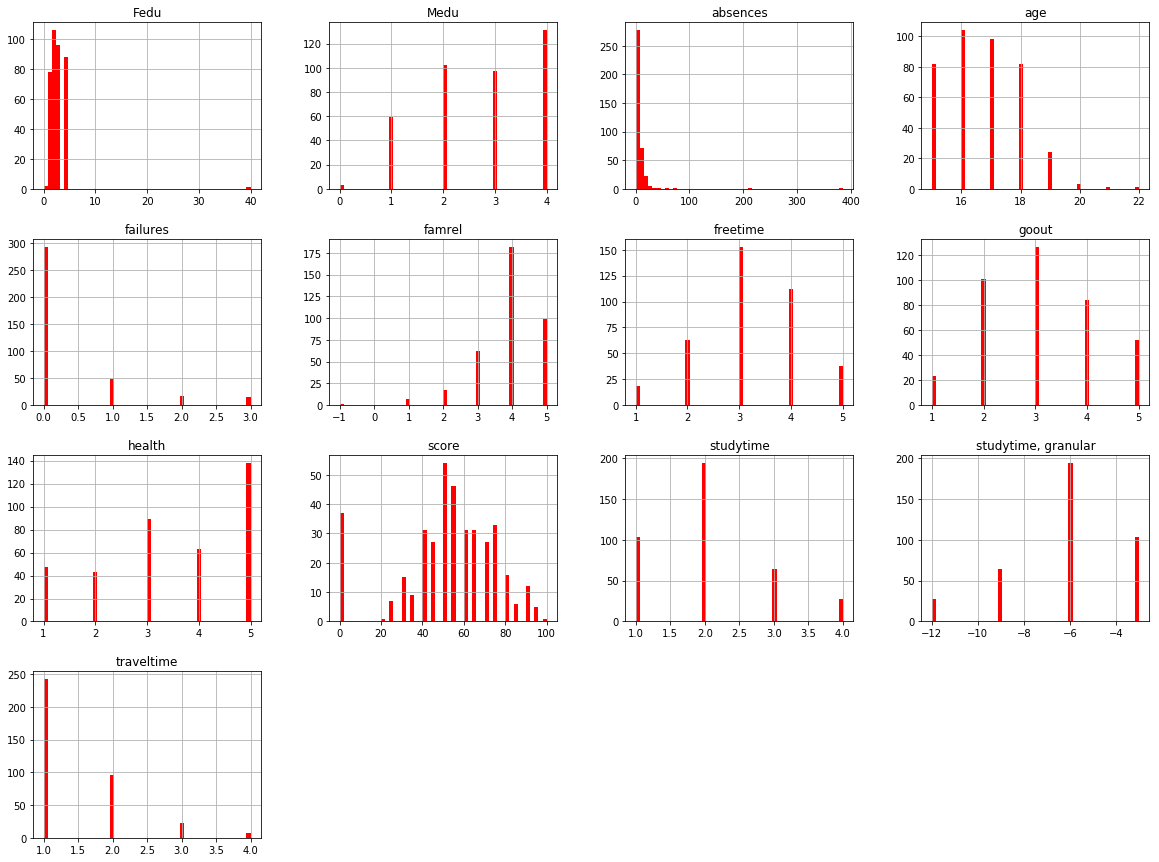

In [4]:
df.hist(bins=50, figsize=(20,15), color='r')
plt.show()

После визуального рассмотрения можно сделать следующие выводы:

1. Выбросы в Fedu
2. Выбросы в absences
3. Выбросы в famrel
4. Очень много score=0, никаких значение в отрезке от 0 до 20. 
Скорее всего 0 это отсутсвие значения score.
5. много failures = 0 (???)
6. studytime и studytime,granular полностью коррелируются

Так, как переменные 'studytime, granular' и 'studytime' 
скоррелированы полностью, одну переменную можно исключить.

In [5]:
df.drop(['studytime, granular'], inplace = True, axis = 1)

Рассмотрим все столбцы по отдельности



## school

Выбросов нет, пустых значений тоже нет

In [6]:

pd.DataFrame(df.school.value_counts())

,school
GP,349
MS,46


## sex
 
Выбросов нет, пустых значений тоже нет

In [7]:
pd.DataFrame(df.sex.value_counts())

,sex
F,208
M,187


## age

Возраст учеников в диапазоне 15-22, выбросов нет, пустых значений тоже нет

In [8]:
pd.DataFrame(df.age.value_counts())

,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


## address

Есть часть пустых значений, заменим их на None

In [9]:
#pd.DataFrame(df.address.value_counts())
#print(df.address.nunique())

df['address'] = df['address'].apply(lambda x: None if pd.isnull(x) else x)


## famsize

Есть часть пустых значений, заменим их на None

In [10]:
#pd.DataFrame(df.famsize.value_counts())
df['famsize'] = df['famsize'].apply(lambda x: None if pd.isnull(x) else x)

## Pstatus

Есть часть пустых значений, заменим их на None

In [11]:
pd.DataFrame(df.Pstatus.value_counts())
df['Pstatus'] = df['Pstatus'].apply(lambda x: None if pd.isnull(x) else x)

## Medu

Есть пустые значения , заменим их модой.

In [12]:
#pd.DataFrame(df.Medu.value_counts())

Medu_mode = float(df.Medu.mode())
df['Medu'] = df['Medu'].apply(lambda x: Medu_mode if pd.isnull(x) else x)

## Fedu

Есть пустые значения и значения за пределами интервала 0-4, заменим их модой.

In [13]:
#pd.DataFrame(df.Fedu.value_counts())

Fedu_mode = float(df.Fedu.mode())
df['Fedu'] = df['Fedu'].apply(lambda x: Fedu_mode if (pd.isnull(x) | (x<0) | (x>4)) else x )


## Mjob

Есть часть пустых значений, заменим их на 'other'

In [14]:
pd.DataFrame(df.Mjob.value_counts())
df['Mjob'] = df['Mjob'].apply(lambda x: 'other' if pd.isnull(x) else x)

## Fjob

Есть часть пустых значений, заменим их на 'other'

In [15]:
df['Fjob'] = df['Fjob'].apply(lambda x: 'other' if pd.isnull(x) else x)

## reason

Есть часть пустых значений, заменим их на 'other'

In [16]:
df['reason'] = df['reason'].apply(lambda x: 'other' if pd.isnull(x) else x)

## guardian

Есть часть пустых значений, заменим их на 'other'

In [17]:
df['guardian'] = df['guardian'].apply(lambda x: 'other' if pd.isnull(x) else x)

## traveltime

Часть пустых значений заменим модой

In [18]:
traveltime_mode = float(df.traveltime.mode())
df['traveltime'] = df['traveltime'].apply(lambda x: traveltime_mode if pd.isnull(x) else x)

## studytime

Часть пустых значений заменим модой

In [19]:
pd.DataFrame(df.studytime.value_counts())



studytime_mode = float(df.studytime.mode())
df['studytime'] = df['studytime'].apply(lambda x: studytime_mode if pd.isnull(x) else x)

## failures

Часть пустых значений заменим модой

In [20]:
#df.failures.count()
#pd.DataFrame(df.failures.value_counts())


failures_mode = float(df.failures.mode())
df['failures'] = df['failures'].apply(lambda x: failures_mode if pd.isnull(x) else x)

## schoolsup

Есть часть пустых значений. Так как они имеют бинарные значения -  заменим их на None

In [21]:
df['schoolsup'] = df['schoolsup'].apply(lambda x: None if pd.isnull(x) else x)

## famsup

Есть часть пустых значений. Так как они имеют бинарные значения -  заменим их на None

In [22]:
df['famsup'] = df['famsup'].apply(lambda x: None if pd.isnull(x) else x)

## paid

Есть часть пустых значений. Так как они имеют бинарные значения -  заменим их на None

In [23]:
df['paid'] = df['paid'].apply(lambda x: None if pd.isnull(x) else x)

## activities

Есть часть пустых значений. Так как они имеют бинарные значения -  заменим их на None

In [24]:
df['activities'] = df['activities'].apply(lambda x: None if pd.isnull(x) else x)

## nursery

Есть часть пустых значений. Так как они имеют бинарные значения -  заменим их на None

In [25]:
df['nursery'] = df['nursery'].apply(lambda x: None if pd.isnull(x) else x)

## higher

Есть часть пустых значений. Так как они имеют бинарные значения -  заменим их на None

In [26]:
df['higher'] = df['higher'].apply(lambda x: None if pd.isnull(x) else x)

## internet

Есть часть пустых значений. Так как они имеют бинарные значения -  заменим их на None

In [27]:
df['internet'] = df['internet'].apply(lambda x: None if pd.isnull(x) else x)

## romantic

Есть часть пустых значений. Так как они имеют бинарные значения -  заменим их на None

In [28]:
df['romantic'] = df['romantic'].apply(lambda x: None if pd.isnull(x) else x)

## famrel

Есть значние, которое не входит в диапазон. Заменим его модой.

In [29]:
#pd.DataFrame(df.famrel.value_counts())

famrel_mode = float(df.famrel.mode())
df['famrel'] = df['famrel'].apply(lambda x: famrel_mode if (pd.isnull(x) | (x<=0)) else x )

## freetime

Есть часть пустых значений. Заменим их модой.

In [30]:
#pd.DataFrame(df.freetime.value_counts())


freetime_mode = float(df.freetime.mode())
df['freetime'] = df['freetime'].apply(lambda x: freetime_mode if pd.isnull(x) else x)

## goout

Есть часть пустых значений. Заменим их модой.

In [31]:
#pd.DataFrame(df.goout.value_counts())

goout_mode = float(df.goout.mode())
df['goout'] = df['goout'].apply(lambda x: goout_mode if pd.isnull(x) else x)

## health

Есть часть пустых значений. Заменим их модой.

In [32]:
#pd.DataFrame(df.health.value_counts())



health_mode = float(df.health.mode())
df['health'] = df['health'].apply(lambda x: health_mode if pd.isnull(x) else x)

## absences

Ранее упоминалось, основываясь на гистограмме, что absences содержит выбросы.
Отфильтруем выбросы — воспользовавшись формулой интерквартильного расстояния 


25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


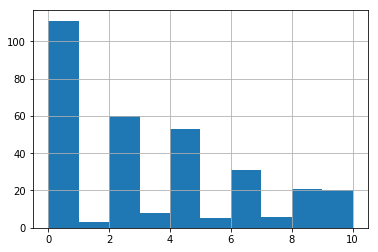

In [33]:
IQR = df.absences.quantile(0.75) - df.absences.quantile(0.25)
perc25 = df.absences.quantile(0.25)
perc75 = df.absences.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75), "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
df.absences.loc[df.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, range = (0, 10), label = 'IQR')

Поставим медианное значениe  для тех, кто выходит за границы выбросов.


In [34]:
absences_mean = df.absences.mean()

df['absences'] = df['absences'].apply(lambda x: absences_mean if (x>(perc75 + 1.5*IQR)) else x )

## score

Отфильтруем только те записи, у которых score > 0 так, как записи где score = 0 не помогут в анализе

In [35]:
df = df[df.score > 0]

In [36]:
Убедимся визуально на гистограмме, что обработка и преобразование данных выполнена корректно.

SyntaxError: invalid syntax (<ipython-input-36-6c09ac45015a>, line 1)

In [ ]:
df.hist(bins=50, figsize=(20,15), color='r')
plt.show()

Проверим корреляцию между значениями через heatmap

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(new_corr,
           xticklabels=new_corr.columns.values,
           yticklabels = new_corr.columns.values,
            ax = ax,
           ).set_title("Correlation Between Columns")


plt.show()

In [ ]:
Построим матрицу корреляций.
Отобрази для score отсортируем по спаданию.

In [ ]:
new_corr = df.corr()
#new_corr
new_corr['score'].sort_values(ascending=False)

Можно сделать следующие выводы:
    * score коррелируется с Medu, studytime, Fedu
    * есть корреляция между Medu и Fedu
    * есть корреляция между goout и freetime (что логично)

In [ ]:
Проанализируем номинативные переменные, построим для них графики

In [ ]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=df,ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()    
      
            
for col in ['school','sex','address','famsize','Pstatus','Mjob','Fjob','reason','guardian','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']:    
    get_boxplot(col)



In [ ]:
Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента

In [ ]:
def get_stat_dif(column):
    cols = df.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df.loc[df.loc[:, column] == comb[0], 'score'], 
                        df.loc[df.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break  

for col in ['school','sex','address','famsize','Pstatus','Mjob','Fjob','reason','guardian','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']:
    get_stat_dif(col)
    


In [ ]:
Можно сделаьть выводы, что следующие номантивные значения вляют на оценку: address, Mjob, Fjob, schoolsup

In [ ]:
Выводы


Итак, в результате EDA для анализа влияния характеристик студентов на результат экзамена были получены следующие выводы:

* В данных присутсвует часть пустых значений, в основном на номанативных переменных.
* Выбросы найдены в столбцах:Fedu, absences, famrel
* Положительная корреляция параметра goout и freetime говорит о том, 
    что чем больше свободного времени, тем больше его тратят с друзьями, 
    что выглядит естественно и обьяснимо.
* Положительная корреляция параметра Medu и Fedu может говорить о том, 
    что если один родитель имеет образование, то скорее всего второй рродитель имеет его тоже. 
    Что может сказываться на образовании детей в семье.
* Положительная корреляция параметра studytime и score модет говорить о том,
    чем больше времени уделять учебе, тем выше оценка, что тоэже выглядит логично.

    Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, 
    это Medu, studytime, Fedu, address, Mjob, Fjob, schoolsup.